In [29]:
#Mean Shift Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset = pd.read_csv('Mall_Customers.csv')

In [31]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
X = dataset.iloc[:, [3, 4]].values

In [33]:
#original data

In [47]:
from sklearn.cluster import MeanShift

from packaging import version
import joblib

joblib_version = joblib.__version__

if version.parse(joblib_version) < version.parse("1.0.0"):
    print("Using old version of joblib")
else:
    print("Using newer version of joblib")
    
clustering = MeanShift(bandwidth=10).fit(X)
    
clustering.labels_

Using newer version of joblib


array([ 9,  6,  7,  6,  9,  6,  7, 15,  7,  6,  7, 15,  7,  6,  7,  6,  9,
        6,  9, 15,  9,  6,  7,  6, 14, 12,  9,  6, 10, 12,  7,  6,  7, 12,
       14, 12, 14,  6, 10, 12, 10, 12, 10,  1, 10,  1,  1,  1, 10, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  3,  5,  0,  2,  4,  5,  4,  5,  0,  5,  4,  2,
        4,  5,  4,  5,  4,  2,  0,  2,  4,  2,  3,  5,  3,  2,  3,  2,  3,
        5,  3,  2,  4,  5,  4,  5,  3,  2,  4,  2,  3,  5,  3,  2,  3, 17,
        3,  5,  3,  8,  3,  8,  3,  5, 11,  8, 13,  8, 11,  8, 13,  8, 11,
       17, 11,  8, 11, 17, 23, 22, 21, 16, 20, 16, 19, 18], dtype=int64)

In [48]:
clustering

MeanShift(bandwidth=10)

In [49]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

n_clusters = len(np.unique(labels))
print(f"Estimated number of clusters: {n_clusters}")

Estimated number of clusters: 24


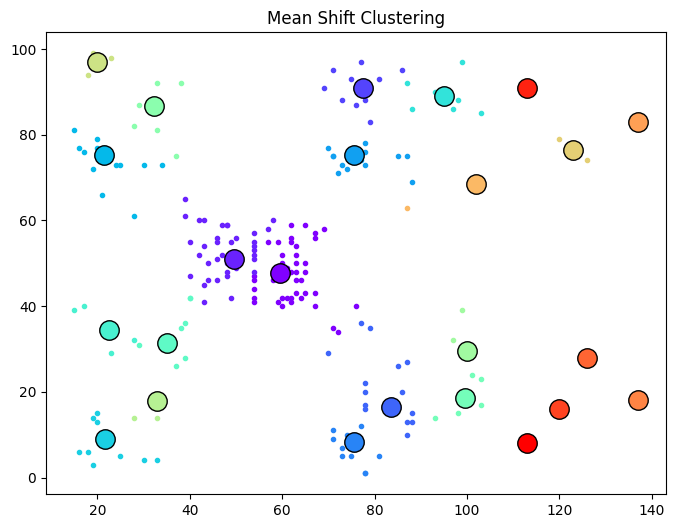

In [50]:
plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    cluster_members = (labels == k)
    plt.plot(X[cluster_members, 0], X[cluster_members, 1], '.', color=col)
    plt.plot(cluster_centers[k][0], cluster_centers[k][1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Mean Shift Clustering')
plt.show()

In [51]:
unsupervised=pd.DataFrame(dataset)

In [52]:
unsupervised['Cluster_group']=labels

In [53]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,9
1,2,Male,21,15,81,6
2,3,Female,20,16,6,7
3,4,Female,23,16,77,6
4,5,Female,31,17,40,9
...,...,...,...,...,...,...
195,196,Female,35,120,79,16
196,197,Female,45,126,28,20
197,198,Male,32,126,74,16
198,199,Male,32,137,18,19


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


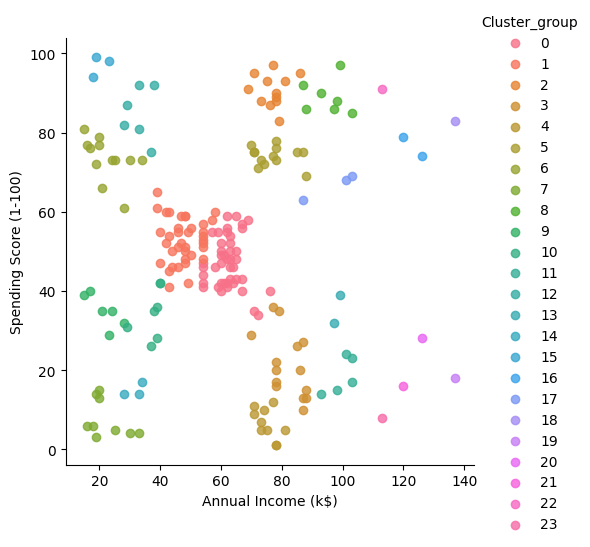

In [55]:
import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

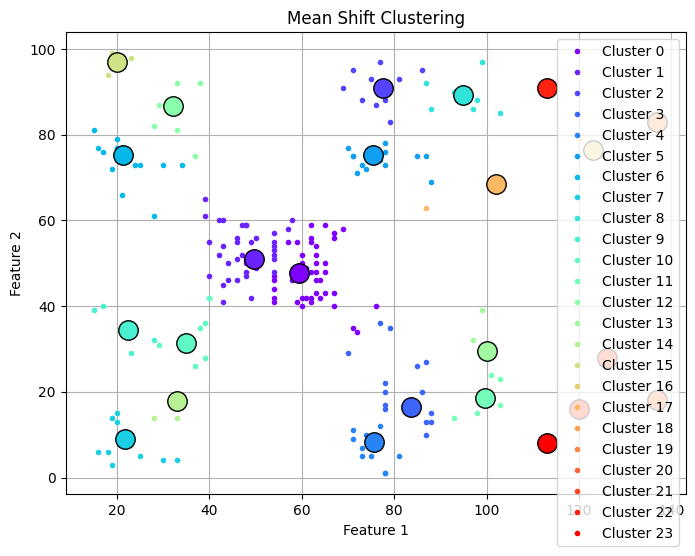

In [56]:
plt.figure(figsize=(8, 6))

colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    # Get data points for the current cluster
    members = (labels == k)
    
    # Plot cluster members
    plt.plot(X[members, 0], X[members, 1], '.', color=col, label=f'Cluster {k}')
    
    # Plot cluster center
    plt.plot(cluster_centers[k][0], cluster_centers[k][1], 'o', markerfacecolor=col,
             markeredgecolor='black', markersize=14)

# axis and labels
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.metrics import silhouette_score 
score = silhouette_score(X,labels)
print("Silhouette Score:" , score) 

Silhouette Score: 0.38359672248282123
